We'll follow the [PyTorch Fundamentals](https://www.learnpytorch.io/00_pytorch_fundamentals/) tutorial by [@mrdbourke](https://github.com/mrdbourke/pytorch-deep-learning)

# Learnings
- Note the difference between the two methods: *torch.tensor()* and *torch.Tensor()*
  - The former method create a tensor with the input value.
  - The later method treats a scalar input as a the size of a zero tensor.
- *tensor.item()* is available just for scalars.
- *tensor.shape*, *tensor.dtype* and *tensor.device* are some of the important properties of a torch tensor.
- Torch on Mac M1 uses "mps" device. Regular GPUs use "cuda" device.

# Module Imports

In [174]:
import torch

import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

from pathlib import Path

torch.__version__

'2.1.0.dev20230608'

# Tensor Creation and its Properties

In [42]:
# Scalar

scalar = torch.tensor(7)
print(f'\nScalar')
print('-------------')
print(f'Value: {scalar}')
print(f'NDIM:{scalar.ndim}, Value: {scalar.item()}')

# Vector
vector = torch.Tensor([7, 7])
print('\nVector')
print('-------------')
print(f'Value: {vector}')
print(f'NDIM: {vector.ndim} Shape: {vector.shape}')

# Matrix
matrix = torch.tensor([
    [1, 2],
    [3, 4]
])
print(f'\nMatrix')
print('-------------')
print(f'Value: {matrix}')
print(f'NDIM: {matrix.ndim} Shape: {matrix.shape}')

# Tensor
tensor = torch.tensor([
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ]
])
print(f'\nTensor')
print('-------------')
print(f'Value: {tensor}')
print(f'NDIM: {tensor.ndim} Shape: {tensor.shape}')

# Random Tensor
tensor = torch.rand(size=(3, 4))
print(f'\nRandom Tensor')
print('-------------')
print(f'Value: {tensor}')
print(f'Shape: {tensor.shape} Type: {tensor.dtype}')

# Zero Tensor
tensor = torch.zeros(size=(3, 4))
print(f'\nZero Tensor')
print('-------------')
print(f'Value: {tensor}')
print(f' Shape: {tensor.shape} Type: {tensor.dtype}')

# One Tensor
tensor = torch.ones(size=(3, 4))
print(f'\One Tensor')
print('-------------')
print(f'Value: {tensor}')
print(f'Shape: {tensor.shape} Type: {tensor.dtype}')

# Range Tensor
start, end, step = 1, 20, 4
tensor = torch.arange(start, end, step)
print(f'\Range Tensor')
print('-------------')
print(f'Value: {tensor}')
print(f'Shape: {tensor.shape} Type: {tensor.dtype}')

# Tensor 'like' Tensor
zero_tensor = torch.zeros([2, 5])
tensor = torch.ones_like(zero_tensor)
print(f'\nTensor \'like\' Tensor')
print('-------------')
print(f'Source Tensor: {zero_tensor}')
print(f'Value: {tensor}')
print(f'Shape: {tensor.shape} Type: {tensor.dtype}')

# Tensor with datatype
tensor = torch.ones([5, 5], dtype=torch.float16)
print(f'\nTensor \'like\' Tensor')
print('-------------')
print(f'Source Tensor: {zero_tensor}')
print(f'Value: {tensor}')
print(f'Shape: {tensor.shape} Type: {tensor.dtype} Device: {tensor.device}')


Scalar
-------------
Value: 7
NDIM:0, Value: 7

Vector
-------------
Value: tensor([7., 7.])
NDIM: 1 Shape: torch.Size([2])

Matrix
-------------
Value: tensor([[1, 2],
        [3, 4]])
NDIM: 2 Shape: torch.Size([2, 2])

Tensor
-------------
Value: tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
NDIM: 3 Shape: torch.Size([1, 3, 3])

Random Tensor
-------------
Value: tensor([[0.0061, 0.6721, 0.6355, 0.3499],
        [0.1928, 0.9904, 0.1583, 0.9303],
        [0.4737, 0.1640, 0.5281, 0.9073]])
Shape: torch.Size([3, 4]) Type: torch.float32

Zero Tensor
-------------
Value: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
 Shape: torch.Size([3, 4]) Type: torch.float32
\One Tensor
-------------
Value: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
Shape: torch.Size([3, 4]) Type: torch.float32
\Range Tensor
-------------
Value: tensor([ 1,  5,  9, 13, 17])
Shape: torch.Size([5]) Type: torch.int64

Tensor 'like' Tens

# Tensor Arithmetics

In [68]:
# Addition
a = torch.tensor([1, 2 , 3])
b = a + 3
print(f'\nTensor Addition')
print('-------------')
print(f'a: {a}')
print(f'b = a + 3: {b}')
print(f'Value: {a}')

# Subtraction
a = torch.tensor([1, 2 , 3])
b = a - 3
print(f'\nTensor Subtraction')
print('-------------')
print(f'a: {a}')
print(f'b = a - 3: {b}')
print(f'Value: {a}')

# Multiplication
a = torch.tensor([1, 2 , 3])
b = a * 3
print(f'\nTensor Multiplication')
print('-------------')
print(f'a: {a}')
print(f'b = a * 3: {b}')
print(f'Value: {a}')

# Matrix Multiplication
a = torch.tensor([[1, 2, 3]])
b = torch.tensor([[4, 5, 6]]).T
result = a @ b
print(f'\nMatrix Multiplication')
print('-------------')
print(f'a: {a} Shape: {a.shape}')
print(f'b: {b} Shape: {b.shape}')
print(f'result = a @ b: {result} Shape: {result.shape}')

# Matrix Multiplication in a Linear Layer
a = torch.tensor([[1, 2, 3]], dtype=torch.float32)
l = torch.nn.Linear(in_features=3, out_features=6)
result = l(a)
print(f'\nMatrix Multiplication in a Linear Layer')
print('-------------')
print(f'a: {a} Shape: {a.shape}')
print(f'result = linear(a): {result} Shape: {result.shape}')

# Change Dtype
a = torch.tensor([[1, 2, 3]])
b = a.type(torch.float32)
print(f'\nChange dtype')
print('-------------')
print(f'a: {a} Dtype: {a.dtype}')
print(f'b: {b} Dtype: {b.dtype}')

# Min, Max, Mean, Sum
a = torch.tensor([[1, 2, 3]])
min_value = a.min()
max_value = a.max()
mean_value = a.type(torch.float32).mean()
sum_value = a.sum()
print(f'\nMin, Max, Mean, and Sum')
print('-------------')
print(f'a: {a} Shape: {a.shape}')
print(f'Min: {min_value} Max: {max_value} Mean: {mean_value} Sum: {sum_value}')

# Argmin and Argmax
a = torch.tensor([[1, 2, 3]])
argmin = a.argmin()
argmax = a.argmax()

print(f'\nArgmin and Argmax')
print('-------------')
print(f'a: {a} Shape: {a.shape}')
print(f'Argmin: {argmin} Argmax: {argmax}')


Tensor Addition
-------------
a: tensor([1, 2, 3])
b = a + 3: tensor([4, 5, 6])
Value: tensor([1, 2, 3])

Tensor Subtraction
-------------
a: tensor([1, 2, 3])
b = a - 3: tensor([-2, -1,  0])
Value: tensor([1, 2, 3])

Tensor Multiplication
-------------
a: tensor([1, 2, 3])
b = a * 3: tensor([3, 6, 9])
Value: tensor([1, 2, 3])

Matrix Multiplication
-------------
a: tensor([[1, 2, 3]]) Shape: torch.Size([1, 3])
b: tensor([[4],
        [5],
        [6]]) Shape: torch.Size([3, 1])
result = a @ b: tensor([[32]]) Shape: torch.Size([1, 1])

Matrix Multiplication in a Linear Layer
-------------
a: tensor([[1., 2., 3.]]) Shape: torch.Size([1, 3])
result = linear(a): tensor([[-0.7548, -2.0165, -0.5374, -0.5552,  1.8785, -2.3353]],
       grad_fn=<AddmmBackward0>) Shape: torch.Size([1, 6])

Change dtype
-------------
a: tensor([[1, 2, 3]]) Dtype: torch.int64
b: tensor([[1., 2., 3.]]) Dtype: torch.float32

Min, Max, Mean, and Sum
-------------
a: tensor([[1, 2, 3]]) Shape: torch.Size([1, 3])
Mi

# Tensor Stacking and Reshaping Operations

In [86]:
# Reshape
x = torch.arange(1, 11)
result = x.reshape(2, 5)
print(f'\nReshape')
print('-------------')
print(f'x: {x} Shape: {x.shape}')
print(f'Result: {result} Shape: {result.shape}')

# View
x = torch.arange(1, 11)
result = x.view(5, 2)
print(f'\nView')
print('-------------')
print(f'x: {x} Shape: {x.shape}')
print(f'Result: {result} Shape: {result.shape}')

# Stack
x = torch.arange(1, 11).reshape(5, 2)
result = torch.stack([x[0, :], x[2, :]])
print(f'\nStack')
print('-------------')
print(f'x: {x} Shape: {x.shape}')
print(f'Result: {result} Shape: {result.shape}')

# Squeeze
x = torch.arange(1, 11).reshape(1, 10)
result = x.squeeze()
print(f'\nSqueeze')
print('-------------')
print(f'x: {x} Shape: {x.shape}')
print(f'Result: {result} Shape: {result.shape}')

# Unsqueeze
x = torch.arange(1, 11)
result = x.unsqueeze(dim=0)
print(f'\nUnsqueeze')
print('-------------')
print(f'x: {x} Shape: {x.shape}')
print(f'Result: {result} Shape: {result.shape}')

# Permute
x = torch.rand(5, 3, 2)
result = x.permute(2, 0, 1)
print(f'\Permute')
print('-------------')
print(f'x: {x} Shape: {x.shape}')
print(f'Result: {result} Shape: {result.shape}')


Reshape
-------------
x: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]) Shape: torch.Size([10])
Result: tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]]) Shape: torch.Size([2, 5])

View
-------------
x: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]) Shape: torch.Size([10])
Result: tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10]]) Shape: torch.Size([5, 2])

Stack
-------------
x: tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10]]) Shape: torch.Size([5, 2])
Result: tensor([[1, 2],
        [5, 6]]) Shape: torch.Size([2, 2])

Squeeze
-------------
x: tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]) Shape: torch.Size([1, 10])
Result: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]) Shape: torch.Size([10])

Unsqueeze
-------------
x: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]) Shape: torch.Size([10])
Result: tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]) Shape: torch.Size([1, 10])
\Perm

# Interoperability with NumPy

In [98]:
# NumPy to torch tensor
x = np.arange(1, 11)
result = torch.from_numpy(x)

print(f'\nNumPy to Torch Tensor')
print('-----------------------')
print(f'x: {x} Shape: {x.shape}')
print(f'Result: {result} Shape: {result.shape}')

# Torch tensor to NumPy
x = torch.arange(1, 11)
result = x.numpy()

print(f'\nTorch Tensor to NumPy')
print('-----------------------')
print(f'x: {x} Shape: {x.shape}')
print(f'Result: {result} Shape: {result.shape}')



NumPy to Torch Tensor
-----------------------
x: [ 1  2  3  4  5  6  7  8  9 10] Shape: (10,)
Result: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]) Shape: torch.Size([10])

Torch Tensor to NumPy
-----------------------
x: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]) Shape: torch.Size([10])
Result: [ 1  2  3  4  5  6  7  8  9 10] Shape: (10,)


# Reproducibility

In [109]:
# Non-reproducible Randomness
a = torch.rand(3, 4)
b = torch.rand(3, 4)
result = a == b

print(f'\nNon-reproducible Randomness')
print('------------------------------')
print(f'a: {a} Shape: {a.shape}')
print(f'b: {b} Shape: {b.shape}')
print(f'Comparison Result: {result} Shape: {result.shape}')

# Reproducible Randomness
SEED = 5

torch.manual_seed(SEED)
a = torch.rand(3, 4)

torch.manual_seed(SEED)
b = torch.rand(3, 4)
result = a == b

print(f'\nReproducible Randomness')
print('-----------------------')
print(f'a: {a} Shape: {a.shape}')
print(f'b: {b} Shape: {b.shape}')
print(f'Comparison Result: {result} Shape: {result.shape}')


Non-reproducible Randomness
------------------------------
a: tensor([[0.0724, 0.6593, 0.7150, 0.5793],
        [0.9809, 0.6502, 0.0566, 0.9201],
        [0.6698, 0.2615, 0.0407, 0.7850]]) Shape: torch.Size([3, 4])
b: tensor([[0.9752, 0.0903, 0.5273, 0.6794],
        [0.2639, 0.3906, 0.1661, 0.2636],
        [0.0442, 0.4884, 0.7965, 0.7432]]) Shape: torch.Size([3, 4])
Comparison Result: tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]]) Shape: torch.Size([3, 4])

Reproducible Randomness
-----------------------
a: tensor([[0.8303, 0.1261, 0.9075, 0.8199],
        [0.9201, 0.1166, 0.1644, 0.7379],
        [0.0333, 0.9942, 0.6064, 0.5646]]) Shape: torch.Size([3, 4])
b: tensor([[0.8303, 0.1261, 0.9075, 0.8199],
        [0.9201, 0.1166, 0.1644, 0.7379],
        [0.0333, 0.9942, 0.6064, 0.5646]]) Shape: torch.Size([3, 4])
Comparison Result: tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True,

# Torch on Mac M1

In [116]:
# Create a tensor on Mac M1 GPU
mps = torch.device("mps")
x = torch.arange(1, 11, device=mps)

print(f'\nCreate a tensor on Mac M1 GPU')
print('--------------------------------')
print(f'x: {x} Shape: {x.shape} Device: {x.device}')

# Move a tensor to Mac M1 GPU
x = torch.arange(1, 11)
result = x.to(mps)
print(f'\nMove a tensor to Mac M1 GPU')
print('--------------------------------')
print(f'x: {x} Shape: {x.shape} Device: {x.device}')
print(f'Result: {result} Shape: {result.shape} Device: {result.device}')

# Move a tensor from Mac M1 GPU back to CPU
x = torch.arange(1, 11, device=mps)
result = x.cpu()
print(f'\nMove a tensor to Mac M1 GPU')
print('--------------------------------')
print(f'x: {x} Shape: {x.shape} Device: {x.device}')
print(f'Result: {result} Shape: {result.shape} Device: {result.device}')


Create a tensor on Mac M1 GPU
--------------------------------
x: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], device='mps:0') Shape: torch.Size([10]) Device: mps:0

Move a tensor to Mac M1 GPU
--------------------------------
x: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]) Shape: torch.Size([10]) Device: cpu
Result: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], device='mps:0') Shape: torch.Size([10]) Device: mps:0

Move a tensor to Mac M1 GPU
--------------------------------
x: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], device='mps:0') Shape: torch.Size([10]) Device: mps:0
Result: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]) Shape: torch.Size([10]) Device: cpu


# PyTorch Training Workflow

We'll train a simple linear regression model to understand the PyTorch training workflow. The main steps involved in the end-to-end workflow can be outlined as:
- Data Preparation
- Model Design
- Model Training
- Making Predictions
- Model Perisistence and Loading

## Data Preparation

We'll generate random data to train our model. The outputs will be computed based on a simple predefined function. The predefined function will just multiply input by some weight and add to it an offset. This is to ensure that the function is easy to learn.

### Creation

In [123]:
# Function parameters.
weight, bias = 0.7, 0.3

# Data creation.
start, end, step = 0, 1, 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

print('\nData Summary')
print('------------')
print(f'X:: Shape: {X.shape}')
print(f'Y:: Shape: {Y.shape}')
print(f'\nX[:10]: {X[:10]}')
print(f'\nY[:10]: {Y[:10]}')


Data Summary
------------
X:: Shape: torch.Size([50, 1])
Y:: Shape: torch.Size([50, 1])

X[:10]: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

Y[:10]: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


### Training and Test Splits

In [161]:
# Create train/test split
train_split_fraction = 0.8 # Use 80% data for training and the rest for testing.

train_size = int(train_split_fraction * len(X))

X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

print('\nTrain/Test Splits')
print('-----------------')
print(f'X_train: {X_train.shape} Y_train: {Y_train.shape}')
print(f'X_test: {X_test.shape} Y_test: {Y_test.shape}')


Train/Test Splits
-----------------
X_train: torch.Size([40, 1]) Y_train: torch.Size([40, 1])
X_test: torch.Size([10, 1]) Y_test: torch.Size([10, 1])


### Visualization

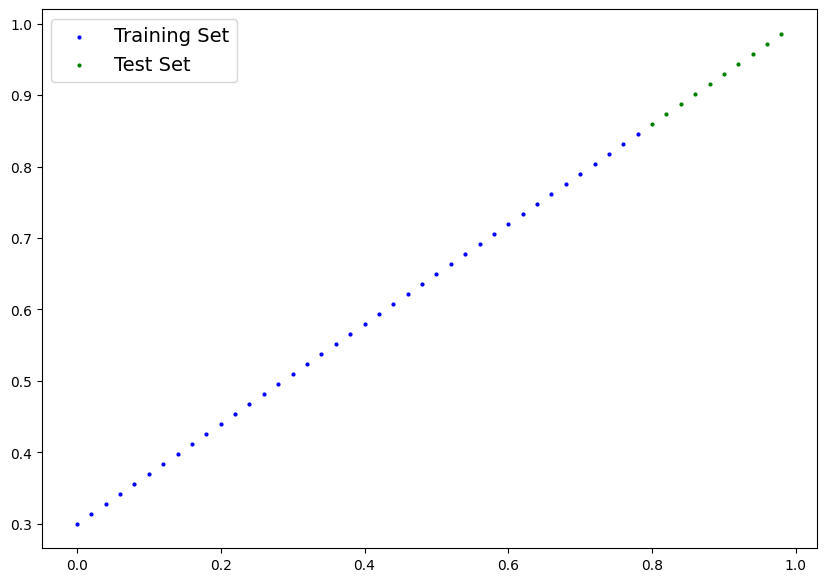

In [162]:
def plot_predictions(train_data=X_train, 
                     train_labels=Y_train, 
                     test_data=X_test, 
                     test_labels=Y_test, 
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Set")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test Set")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

plot_predictions()

## Model Design

### Architecture

In [163]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1), requires_grad=True)
    
    def forward(self, x):
        return self.weights * x + self.bias

SEED = 3
torch.manual_seed(SEED)

model = LinearRegressionModel()

print('\nLinearRegressionModel Parameters')
print(f'--------------------------------')
for p in model.parameters():
    print(f'\n{p}')

model.state_dict()


LinearRegressionModel Parameters
--------------------------------

Parameter containing:
tensor([0.8033], requires_grad=True)

Parameter containing:
tensor([0.1748], requires_grad=True)


OrderedDict([('weights', tensor([0.8033])), ('bias', tensor([0.1748]))])

### Sample Prediction


Sample Predictions
-------------------
y_preds: Shape: torch.Size([10, 1])

Y_test[:10]:: tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

y_preds[:10]:: tensor([[0.8175],
        [0.8335],
        [0.8496],
        [0.8657],
        [0.8817],
        [0.8978],
        [0.9138],
        [0.9299],
        [0.9460],
        [0.9620]])


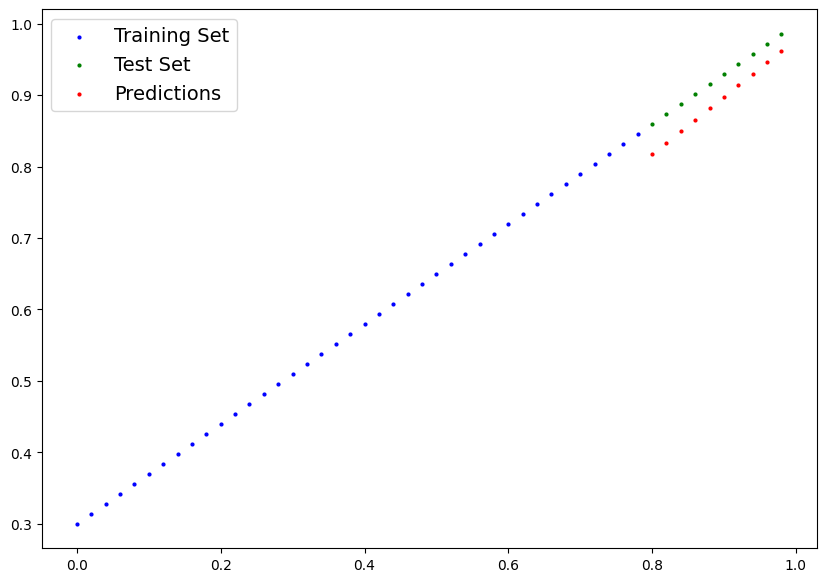

In [164]:
with torch.inference_mode(): 
    y_preds = model(X_test)

print('\nSample Predictions')
print(f'-------------------')
print(f'y_preds: Shape: {y_preds.shape}')
print(f'\nY_test[:10]:: {Y_test[:10]}')
print(f'\ny_preds[:10]:: {y_preds[:10]}')

plot_predictions(predictions=y_preds)

## Model Training

### Loss Function and Optimizer

In [165]:
LR = 0.01
loss_fn = nn.L1Loss() # MAE Loss

# Stochastic Gradient Descent (SGD) Optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=LR) 

### Optimization Loop

In [166]:
torch.manual_seed(SEED)

EPOCHS = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(EPOCHS):
    model.train() # Put the model in the training mode

    # 1. Get model predictions
    y_pred = model(X_train)

    # 2. Calculate the loss between true values and predicted values.
    loss = loss_fn(y_pred, Y_train)

    # 3. Reset optimizer gradients.
    optimizer.zero_grad()

    # 4. Backward pass to compute the gradients
    loss.backward()

    # 5. Apply the computed gradients to the model parameters.
    optimizer.step()

    # Put the model in evaluation mode
    model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, Y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.08488894999027252 | MAE Test Loss: 0.01977989636361599 
Epoch: 10 | MAE Train Loss: 0.02520977333188057 | MAE Test Loss: 0.05137182027101517 
Epoch: 20 | MAE Train Loss: 0.021332750096917152 | MAE Test Loss: 0.049325842410326004 
Epoch: 30 | MAE Train Loss: 0.017900999635457993 | MAE Test Loss: 0.04105328768491745 
Epoch: 40 | MAE Train Loss: 0.014462193474173546 | MAE Test Loss: 0.032780759036540985 
Epoch: 50 | MAE Train Loss: 0.011030814610421658 | MAE Test Loss: 0.025195086374878883 
Epoch: 60 | MAE Train Loss: 0.00759738078340888 | MAE Test Loss: 0.016922563314437866 
Epoch: 70 | MAE Train Loss: 0.004158575087785721 | MAE Test Loss: 0.008650029078125954 
Epoch: 80 | MAE Train Loss: 0.007021299563348293 | MAE Test Loss: 0.002361851977184415 
Epoch: 90 | MAE Train Loss: 0.007021299563348293 | MAE Test Loss: 0.002361851977184415 


### Training Visualization

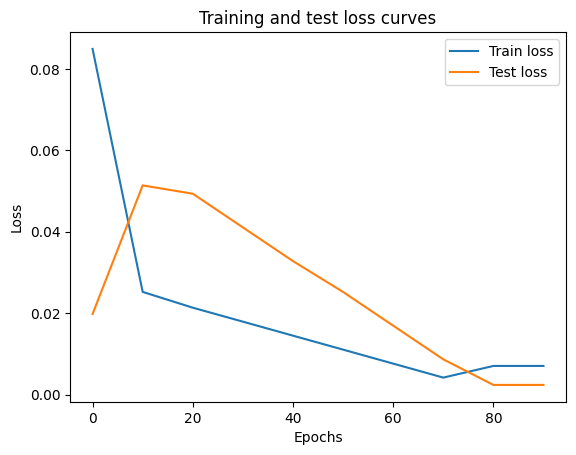

In [167]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### Learned Parameters

In [168]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7082])), ('bias', tensor([0.3038]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## Making Predictions


Final Predictions
-------------------
y_preds: Shape: torch.Size([10, 1])

Y_test[:10]:: tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

y_preds[:10]:: tensor([[0.8704],
        [0.8845],
        [0.8987],
        [0.9129],
        [0.9270],
        [0.9412],
        [0.9554],
        [0.9695],
        [0.9837],
        [0.9978]])


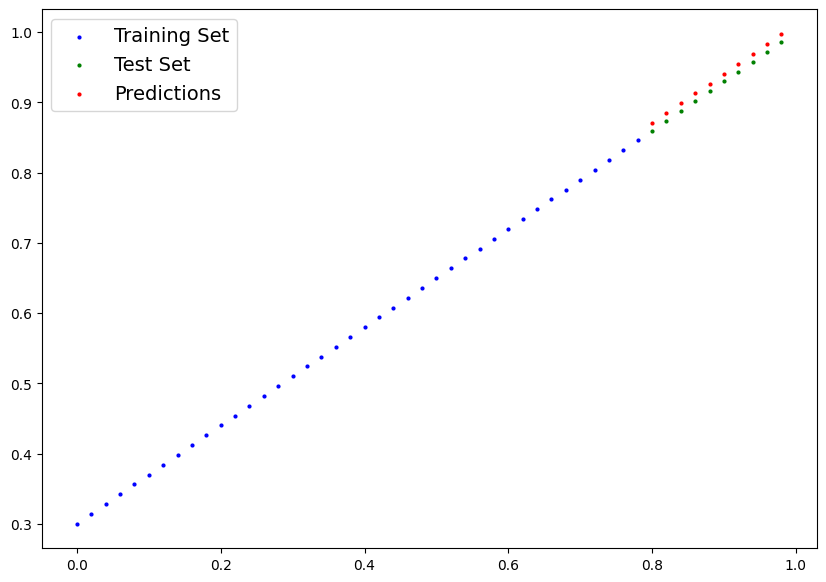

In [169]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)


print('\nFinal Predictions')
print(f'-------------------')
print(f'y_preds: Shape: {y_preds.shape}')
print(f'\nY_test[:10]:: {Y_test[:10]}')
print(f'\ny_preds[:10]:: {y_preds[:10]}')

plot_predictions(predictions=y_preds)

## Saving and loading a PyTorch Model

### Saving and loading a model

In [181]:
### Saving a PyTorch Model ###
# 1. Create models store.
MODELS_STORE = Path("models")
MODELS_STORE.mkdir(parents=True, exist_ok=True)

# 2. Create model save path.
MODEL_NAME = "getting_started_with_pytorch.pth"
MODEL_SAVE_PATH = MODELS_STORE / MODEL_NAME

# 3. Save the model state dict
print('\nSaving a Model')
print('---------------')
print(f"Saving the model model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)
### Saving a PyTorch Model [ENDS] ###

### Loading a PyTorch Model ###
saved_model = LinearRegressionModel() # Instantiate the model with random weights

print('\nLoading a Saved Model')
print('------------------------')
print(f"Loading the model from: {MODEL_SAVE_PATH}")
saved_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH)) # Load the saved parameters


Saving a Model
---------------
Saving the model model to: models/getting_started_with_pytorch.pth

Loading a Saved Model
------------------------
Loading the model from: models/getting_started_with_pytorch.pth


<All keys matched successfully>

### Predictions from the saved model

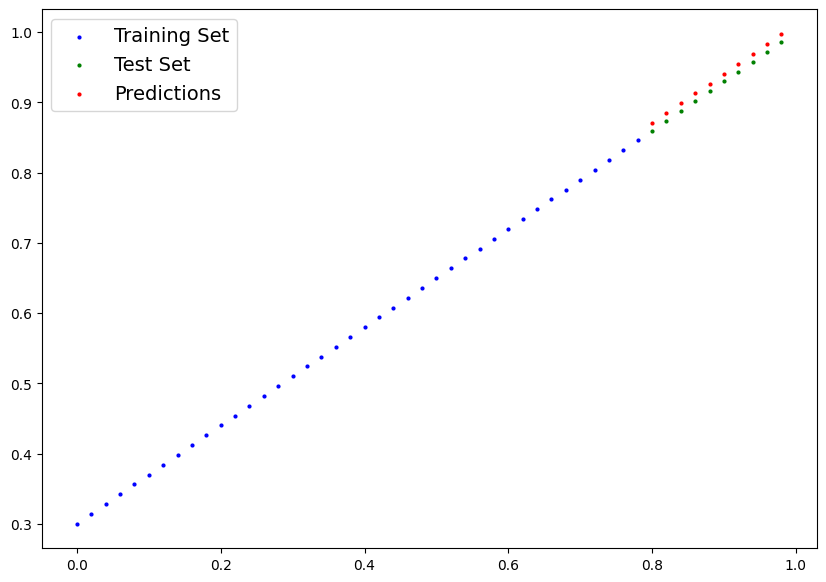

In [183]:
# 1. Put the loaded model into evaluation mode
saved_model.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    saved_model_preds = saved_model(X_test) # perform a forward pass on the test data with the loaded model

plot_predictions(predictions=saved_model_preds)

# Training On GPU

In this exercise, we will use the same architecture on a GPU (MPS for Mac M1)

## Model Design (With LinearLayer)

### Architecture

In [186]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x):
        return self.linear_layer(x)

SEED = 3
torch.manual_seed(SEED)

model = LinearRegressionModel()

print('\nLinearRegressionModel Parameters')
print(f'--------------------------------')
for p in model.parameters():
    print(f'\n{p} Device: {p.device}')

model.state_dict()


LinearRegressionModel Parameters
--------------------------------

Parameter containing:
tensor([[-0.9915]], requires_grad=True) Device: cpu

Parameter containing:
tensor([-0.7889], requires_grad=True) Device: cpu


OrderedDict([('linear_layer.weight', tensor([[-0.9915]])),
             ('linear_layer.bias', tensor([-0.7889]))])

### Model on GPU

In [190]:
device = torch.device("mps")

model.to(device)
next(model.parameters()).device

device(type='mps', index=0)

## Model Training

### Loss Function and Optimizer

In [192]:
LR = 0.01
loss_fn = nn.L1Loss() # MAE Loss

# Stochastic Gradient Descent (SGD) Optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=LR) 

### Optimization Loop

In [193]:
torch.manual_seed(SEED)

EPOCHS = 1000

# Put data on the available device
X_train = X_train.to(device)
Y_train = Y_train.to(device)

X_test = X_test.to(device)
Y_test = Y_test.to(device)

for epoch in range(EPOCHS):
    model.train() # Put the model in the training mode

    # 1. Get model predictions
    y_pred = model(X_train)

    # 2. Calculate the loss between true values and predicted values.
    loss = loss_fn(y_pred, Y_train)

    # 3. Reset optimizer gradients.
    optimizer.zero_grad()

    # 4. Backward pass to compute the gradients
    loss.backward()

    # 5. Apply the computed gradients to the model parameters.
    optimizer.step()

    # Put the model in evaluation mode
    model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, Y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

/Users/broxoli/venv-torch/lib/python3.11/site-packages/torch/autograd/__init__.py:204: UserWarning: The operator 'aten::sgn.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0 | Train loss: 1.7485355138778687 | Test loss: 2.580801248550415
Epoch: 100 | Train loss: 0.5964365005493164 | Test loss: 1.233702540397644
Epoch: 200 | Train loss: 0.1976146399974823 | Test loss: 0.5116909742355347
Epoch: 300 | Train loss: 0.1601119488477707 | Test loss: 0.3744434714317322
Epoch: 400 | Train loss: 0.12574951350688934 | Test loss: 0.29309409856796265
Epoch: 500 | Train loss: 0.09140829741954803 | Test loss: 0.21311822533607483
Epoch: 600 | Train loss: 0.0570630244910717 | Test loss: 0.13245347142219543
Epoch: 700 | Train loss: 0.02272321842610836 | Test loss: 0.05247557908296585
Epoch: 800 | Train loss: 0.008689816109836102 | Test loss: 0.0005149423959665
Epoch: 900 | Train loss: 0.008689816109836102 | Test loss: 0.0005149423959665


### Learned Parameters

In [194]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6915]], device='mps:0')), ('linear_layer.bias', tensor([0.2946], device='mps:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## Making Predictions


Final Predictions
-------------------
y_preds: Shape: torch.Size([10, 1])

Y_test[:10]:: tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]], device='mps:0')

y_preds[:10]:: tensor([[0.8478],
        [0.8616],
        [0.8755],
        [0.8893],
        [0.9031],
        [0.9170],
        [0.9308],
        [0.9446],
        [0.9584],
        [0.9723]], device='mps:0')


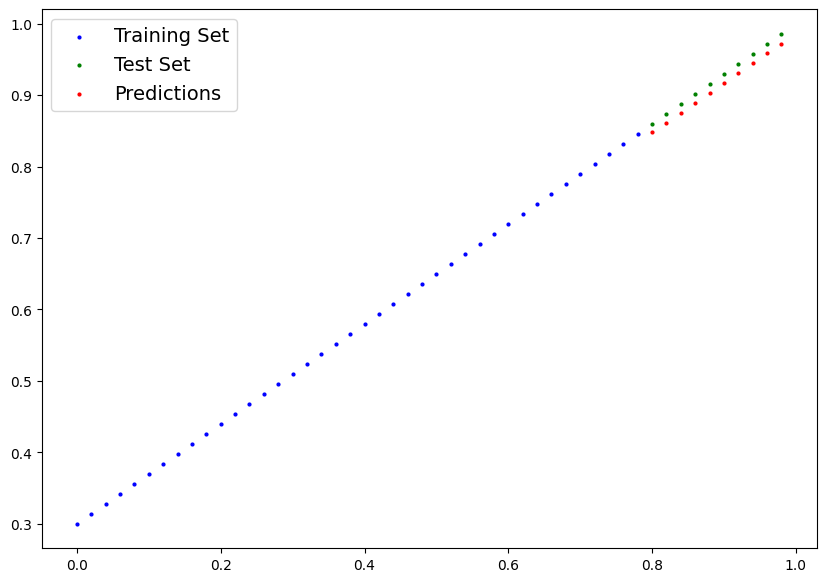

In [196]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)


print('\nFinal Predictions')
print(f'-------------------')
print(f'y_preds: Shape: {y_preds.shape}')
print(f'\nY_test[:10]:: {Y_test[:10]}')
print(f'\ny_preds[:10]:: {y_preds[:10]}')

plot_predictions(predictions=y_preds.cpu())